#Hypothesis Testing: Investigating the Link Between Cryptocurrency and Traditional Financial Markets

This project aims to explore the statistical relationship between Bitcoin (BTC) and the S&P 500 index from 2020 to 2024.
We examine whether their daily returns are correlated, whether this correlation is statistically significant,
and how their volatilities compare over time.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from scipy.stats import pearsonr
warnings.filterwarnings('ignore')


## Step 1: Downloading and Preparing the Data
This part downloads the price data for Bitcoin and S&P 500, saves them as CSV, and prepares them for further analysis.

In [8]:
!pip install yfinance > /dev/null

import yfinance as yf

# Bitcoin
btc = yf.download('BTC-USD', start='2020-01-01', end='2024-01-01')
btc.to_csv('btc.csv')

# S&P 500
sp500 = yf.download('^GSPC', start='2020-01-01', end='2024-01-01')
sp500.to_csv('sp500.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
## Download Processed Data Files

from google.colab import files


files.download('btc.csv')
files.download('sp500.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Calculate Daily Returns

In this step, we compute the daily returns for Bitcoin and the S&P 500
using the percentage change method. These returns will be used for
statistical analysis in the next sections.

In [9]:
btc['Return'] = btc['Close'].pct_change()
sp500['Return'] = sp500['Close'].pct_change()

## Pearson Correlation and Significance Test

In this section, we examine the linear relationship between the daily returns of Bitcoin and the S&P 500 index.
We compute the Pearson correlation coefficient and test its statistical significance using the associated p-value.

In [10]:
# Combine BTC and S&P 500 return data into a single DataFrame
# This is necessary to compute correlation between them
combined = pd.concat([btc['Return'], sp500['Return']], axis=1)
combined.columns = ['BTC', 'SP500']
combined.dropna(inplace=True)

# Compute the Pearson correlation coefficient
correlation = combined.corr().iloc[0,1]
print(f"Correlation between BTC and S&P 500 returns: {correlation:.4f}")

Correlation between BTC and S&P 500 returns: 0.3855


In [11]:
# Import Pearson correlation test from scipy
from scipy.stats import pearsonr

# Perform hypothesis testing using Pearson correlation
# H0: No linear correlation (ρ = 0)
# H1: Linear correlation exists (ρ ≠ 0)
corr, p_value = pearsonr(combined['BTC'], combined['SP500'])
print(f"Pearson Correlation: {corr:.4f}")
print(f"P-value: {p_value:.4f}")


Pearson Correlation: 0.3855
P-value: 0.0000


## Volatility Analysis (30-Day Rolling Standard Deviation)

In this section, we compare the volatility of Bitcoin and the S&P 500 by calculating their rolling 30-day standard deviation of daily returns.
Volatility is a key metric in finance that reflects the risk or uncertainty associated with asset returns.
A higher volatility suggests greater uncertainty and price fluctuations.


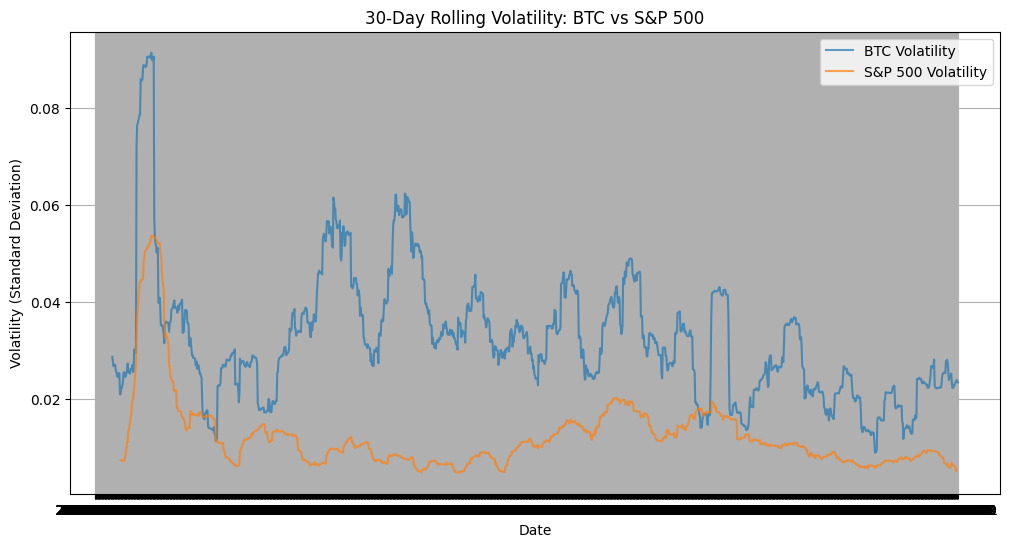

In [ ]:
# Calculate 30-day rolling standard deviation of returns (volatility)
btc['Volatility'] = btc['Return'].rolling(window=30).std()
sp500['Volatility'] = sp500['Return'].rolling(window=30).std()

# Plot the rolling volatility
plt.figure(figsize=(12,6))
plt.plot(btc['Volatility'], label='BTC Volatility', alpha=0.7)
plt.plot(sp500['Volatility'], label='S&P 500 Volatility', alpha=0.7)
plt.title('30-Day Rolling Volatility: BTC vs S&P 500')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend()
plt.grid(True)
plt.show()


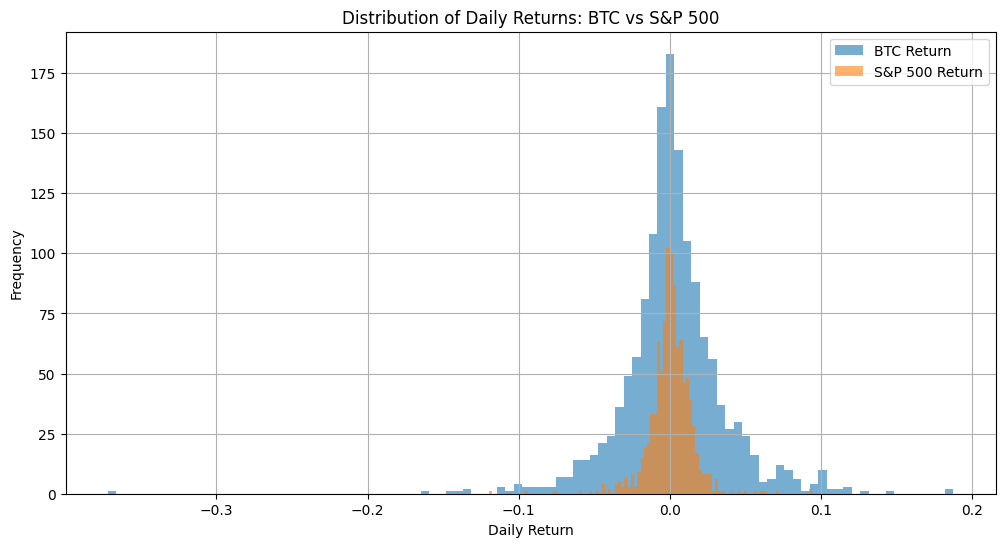

In [12]:
# Plot distribution of daily returns
plt.figure(figsize=(12,6))
plt.hist(btc['Return'].dropna(), bins=100, alpha=0.6, label='BTC Return')
plt.hist(sp500['Return'].dropna(), bins=100, alpha=0.6, label='S&P 500 Return')
plt.title('Distribution of Daily Returns: BTC vs S&P 500')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


## Distribution of Daily Returns (Histogram)

To better understand the behavior of daily returns, we visualize the distribution of returns for both Bitcoin (BTC) and the S&P 500 index using a histogram.

This plot helps us compare the shape, spread, and tails of the two distributions. As expected, BTC exhibits a wider
spread and more extreme values compared to the S&P 500, reflecting its higher volatility and risk profile.

From the histogram, it is evident that:
- BTC returns are more dispersed, with fatter tails, indicating higher frequency of extreme gains or losses.
- S&P 500 returns are more centered around the mean with lower variance, reflecting its stability as a traditional asset.

This supports the earlier findings from the volatility and correlation analyses.


## Summary & Interpretation

Through this hypothesis-driven analysis, we examined the financial behavior of Bitcoin (BTC) in comparison to the S&P 500 index (SP500) between 2020 and 2024.
Our findings are summarized below:

### Correlation of Returns
We observed a moderate positive correlation (r ≈ 0.3855) between the daily returns of BTC and SP500.
This indicates that while there is some level of co-movement between the two assets, Bitcoin retains a distinct behavior from the traditional stock market,
likely due to its speculative nature and decentralized structure.

### Statistical Significance (p-value)
The p-value was found to be approximately 0.0000, indicating that the correlation observed is statistically significant.
In other words, the relationship between BTC and SP500 returns is unlikely to be due to random chance.

### Volatility Comparison
When comparing 30-day rolling volatility, Bitcoin demonstrated consistently higher volatility than the S&P 500.
This is expected, as cryptocurrencies are known for higher price fluctuations and market sensitivity.
This volatility also highlights the risk associated with BTC as an investment vehicle.

### Final Insights
- BTC and SP500 move together to some extent, especially during macroeconomic events, but their volatility profiles differ greatly.
- Investors should account for these volatility differences when constructing diversified portfolios.
- This analysis provides a foundation for understanding how traditional and digital assets behave under similar market conditions.

Overall, this project illustrates the value of combining statistical methods and financial theory to draw meaningful conclusions in modern market analysis.
